# Assignment 1 - Building a Vision Model with Keras

In this assignment, you will build a simple vision model using Keras. The goal is to classify images from the Fashion MNIST dataset, which contains images of clothing items.

You will:
1. Load and inspect the Fashion MNIST dataset.
2. Run a simple baseline model to establish a performance benchmark.
3. Build and evaluate a simple CNN model, choosing appropriate loss and metrics.
4. Design and run controlled experiments on one hyperparameter (e.g., number of filters, kernel size, etc.) and one regularization technique (e.g., dropout, L2 regularization).
5. Analyze the results and visualize the model's performance.

# 1. Loading and Inspecting the Dataset

Fashion MNIST is a dataset of grayscale images of clothing items, with 10 classes. Each image is 28x28 pixels, like the MNIST dataset of handwritten digits. Keras provides a convenient way to load this dataset. 

In this section, you should:

- [ ] Inspect the shapes of the training and test sets to confirm their size and structure.
- [ ] Convert the labels to one-hot encoded format if necessary. (There is a utility function in Keras for this.)
- [ ] Visualize a few images from the dataset to understand what the data looks like.

In [1]:
from tensorflow.keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Normalize the pixel values to be between 0 and 1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Classes in the Fashion MNIST dataset
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [10]:
# Inspect the shapes of the datasets

print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')


# Convert labels to one-hot encoding
from tensorflow.keras.utils import to_categorical

print(f'Before one-hot encoding: {y_train[0]}')
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
print(f'After one-hot encoding: {y_train[0]}')



X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)
Before one-hot encoding: 9
After one-hot encoding: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


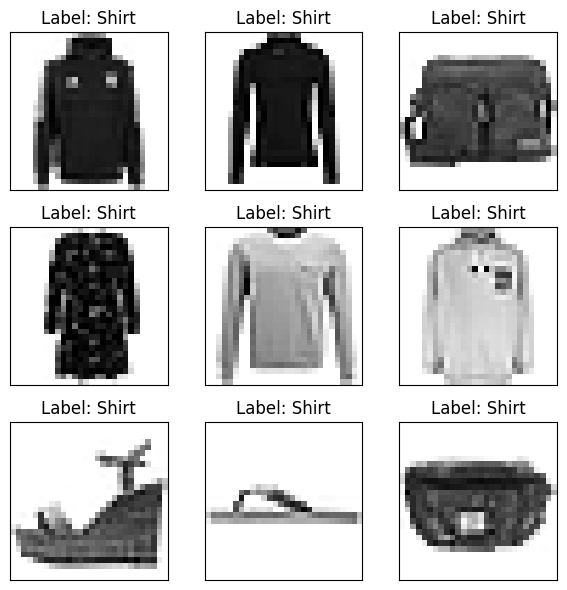

In [35]:
import matplotlib.pyplot as plt
import numpy as np
# Verify the data looks as expected

# Select 9 random indices from the training set
random_indices = np.random.choice(len(X_train), 9, replace=False)

# Create a 3x3 grid plot
fig, axes = plt.subplots(3, 3, figsize=(6, 6))

for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[random_indices[i]], cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f"Label: {class_names[label_index]}")

    # Removing axis labels
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()



Reflection: Does the data look as expected? How is the quality of the images? Are there any issues with the dataset that you notice?

**These images are very low resolution thus it would limit the model performance**

# 2. Baseline Model

In this section, you will create a linear regression model as a baseline. This model will not use any convolutional layers, but it will help you understand the performance of a simple model on this dataset.
You should:
- [ ] Create a simple linear regression model using Keras.
- [ ] Compile the model with an appropriate loss function and optimizer.
- [ ] Train the model on the training set and evaluate it on the test set.

A linear regression model can be created using the `Sequential` API in Keras. Using a single `Dense` layer with no activation function is equivalent to a simple linear regression model. Make sure that the number of units in the output layer matches the number of classes in the dataset.

Note that for this step, we will need to use `Flatten` to convert the 2D images into 1D vectors before passing them to the model. Put a `Flatten()` layer as the first layer in your model so that the 2D image data can be flattened into 1D vectors.

In [43]:
from keras.models import Sequential
from keras.layers import Dense, Flatten

# Create a simple linear regression model
model = Sequential()

# You can use `model.add(<layer>)` to add layers to the model
# Add a Flatten layer to convert 28x28 images into 784-dimensional vectors
model.add(Flatten(input_shape=(28, 28)))

# Add a Dense output layer with 10 units (one per class), no activation function
model.add(Dense(10))  # No activation = linear output


# Compile the model using `model.compile()`
model.compile(
    loss='categorical_crossentropy',   # For multi-class classification
    optimizer='adam',                  # Adaptive optimizer
    metrics=['accuracy']               # Track accuracy during training
)



# Train the model with `model.fit()`
model.fit(
    X_train, # Training data
    y_train, # Training labels
    epochs = 5, # Number of epochs
    batch_size = 32, # Number of samples per batch
    validation_split = 0.2, # Use 20% of the data for validation
    verbose = 1 # Show progress bar during training
)


# Evaluate the model with `model.evaluate()`
loss, accuracy = model.evaluate(X_test, y_test, verbose = 1)

print(f'Loss:     {loss:.2f}')
print(f'Accuracy: {accuracy*100:.2f}%')


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.1665 - loss: 9.1264 - val_accuracy: 0.1735 - val_loss: 9.8952
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.1742 - loss: 9.8791 - val_accuracy: 0.1488 - val_loss: 8.8564
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.2018 - loss: 9.6477 - val_accuracy: 0.2609 - val_loss: 10.0241
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.2682 - loss: 9.0379 - val_accuracy: 0.2804 - val_loss: 10.9666
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.2825 - loss: 8.4555 - val_accuracy: 0.2983 - val_loss: 8.3868
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2954 - loss: 8.2453
Loss:     8.40
Accuracy: 29.73%


Reflection: What is the performance of the baseline model? How does it compare to what you expected? Why do you think the performance is at this level?

**The baseline model achieved an accuracy of approximately 29.7% on the test set, which is significantly lower than the expected number (80%-90%) due to the fact that we used linear regression model with single Dense layer without an activation function.**

# 3. Building and Evaluating a Simple CNN Model

In this section, you will build a simple Convolutional Neural Network (CNN) model using Keras. A convolutional neural network is a type of deep learning model that is particularly effective for image classification tasks. Unlike the basic neural networks we have built in the labs, CNNs can accept images as input without needing to flatten them into vectors.

You should:
- [ ] Build a simple CNN model with at least one convolutional layer (to learn spatial hierarchies in images) and one fully connected layer (to make predictions).
- [ ] Compile the model with an appropriate loss function and metrics for a multi-class classification problem.
- [ ] Train the model on the training set and evaluate it on the test set.

Convolutional layers are designed to accept inputs with three dimensions: height, width and channels (e.g., RGB for color images). For grayscale images like those in Fashion MNIST, the input shape will be (28, 28, 1).

When you progress from the convolutional layers to the fully connected layers, you will need to flatten the output of the convolutional layers. This can be done using the `Flatten` layer in Keras, which doesn't require any parameters.

In [ ]:
from keras.layers import Conv2D

# Reshape the data to include the channel dimension
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Create a simple CNN model
model = Sequential()


# Applying filter to an image
conv = Conv2D(filters=32, kernel_size=(5, 5), padding="same", activation='relu')

# Add a convolutional layer
model.add(conv)

model.add(Flatten())  # Converts 2D feature maps to 1D vector

# Add a Dense layer for classification
model.add(Dense(10, activation='softmax'))  # 10 classes in Fashion MNIST

# Compile the model using model.compile()
model.compile(
    loss='categorical_crossentropy',  # Suitable for one-hot encoded multi-class classification
    optimizer='adam',                 # Efficient optimizer for deep learning
    metrics=['accuracy']              # Track classification accuracy
)


# Train the model with model.fit()
model.fit(
    X_train, # Training data
    y_train, # Training labels
    epochs = 5, # Number of epochs
    batch_size = 32, # Number of samples per batch
    validation_split = 0.2, # Use 20% of the data for validation
    verbose = 1 # Show progress bar during training
)


# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose = 1)

print(f'Loss:     {loss:.2f}')
print(f'Accuracy: {accuracy*100:.2f}%')

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.8120 - loss: 0.5385 - val_accuracy: 0.8782 - val_loss: 0.3437
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.8938 - loss: 0.2994 - val_accuracy: 0.8967 - val_loss: 0.2939
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9101 - loss: 0.2448 - val_accuracy: 0.8963 - val_loss: 0.2978
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9259 - loss: 0.2119 - val_accuracy: 0.9003 - val_loss: 0.2827
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9328 - loss: 0.1866 - val_accuracy: 0.9029 - val_loss: 0.2871
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9024 - loss: 0.2978
Loss:     0.29
Accuracy: 90.04%


Reflection: Did the CNN model perform better than the baseline model? If so, by how much? What do you think contributed to this improvement?

**CNN model performed much better than the baseline. We can see that accuracy is improved from 29.7% to 90.0% (60% improvement).

This boost came from the CNN’s ability to learn spatial features using convolution, ReLU activation for non-linearity, and softmax for proper classification.**

# 3. Designing and Running Controlled Experiments

In this section, you will design and run controlled experiments to improve the model's performance. You will focus on one hyperparameter and one regularization technique.
You should:
- [ ] Choose one hyperparameter to experiment with (e.g., number of filters, kernel size, number of layers, etc.) and one regularization technique (e.g., dropout, L2 regularization). For your hyperparameter, you should choose at least three different values to test (but there is no upper limit). For your regularization technique, simply test the presence or absence of the technique.
- [ ] Run experiments by modifying the model architecture or hyperparameters, and evaluate the performance of each model on the test set.
- [ ] Record the results of your experiments, including the test accuracy and any other relevant metrics.
- [ ] Visualize the results of your experiments using plots or tables to compare the performance of different models.

The best way to run your experiments is to create a `for` loop that iterates over a range of values for the hyperparameter you are testing. For example, if you are testing different numbers of filters, you can create a loop that runs the model with 32, 64, and 128 filters. Within the loop, you can compile and train the model, then evaluate it on the test set. After each iteration, you can store the results in a list or a dictionary for later analysis.

Note: It's critical that you re-initialize the model (by creating a new instance of the model) before each experiment. If you don't, the model will retain the weights from the previous experiment, which can lead to misleading results.

In [55]:
# A. Test Hyperparameters

from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense
from keras.optimizers import Adam

# Reshape input data
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Store results
results = []

# Hyperparameter: number of filters
filter_options = [32, 64, 128]

for filters in filter_options:
    # Re-initialize model
    model = Sequential()
    model.add(Conv2D(filters=filters, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(Flatten())
    model.add(Dense(10, activation='softmax'))

    # Compile
    model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

    # Train
    model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2, verbose=0)

    # Evaluate
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)

    # Record results
    results.append({
        'filters': filters,
        'test_accuracy': round(accuracy * 100, 2),
        'test_loss': round(loss, 4)
    })


   filters  test_accuracy  test_loss
0       32          89.28     0.3029
1       64          89.54     0.3026
2      128          89.55     0.3191


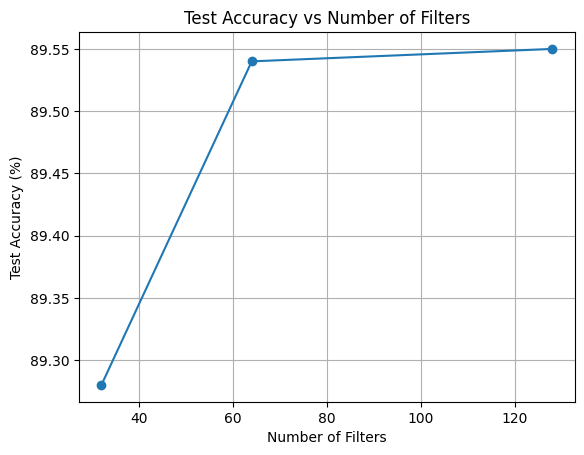

In [56]:
# Visualize Results

import pandas as pd
import matplotlib.pyplot as plt

# Convert to DataFrame
df = pd.DataFrame(results)
print(df)

# Plot accuracy
plt.plot(df['filters'], df['test_accuracy'], marker='o')
plt.title('Test Accuracy vs Number of Filters')
plt.xlabel('Number of Filters')
plt.ylabel('Test Accuracy (%)')
plt.grid(True)
plt.show()


In [63]:

from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense
from keras.optimizers import Adam

# Reshape input data
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Store results
results = []

# Hyperparameter: kernel sizes to test
kernel_sizes = [(3, 3), (5, 5), (7, 7)]

for kernel in kernel_sizes:
    # Re-initialize model
    model = Sequential()
    model.add(Conv2D(filters=32, kernel_size=kernel, activation='relu', input_shape=(28, 28, 1)))
    model.add(Flatten())
    model.add(Dense(10, activation='softmax'))

    # Compile
    model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

    # Train
    model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2, verbose=0)

    # Evaluate
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)

    # Record results
    results.append({
        'kernel_size': f'{kernel[0]}x{kernel[1]}',
        'test_accuracy': round(accuracy * 100, 2),
        'test_loss': round(loss, 4)
    })


c:\Users\faisa\miniconda3\envs\dsi_participant\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


  kernel_size  test_accuracy  test_loss
0         3x3          89.03     0.3059
1         5x5          89.70     0.2949
2         7x7          89.05     0.3094


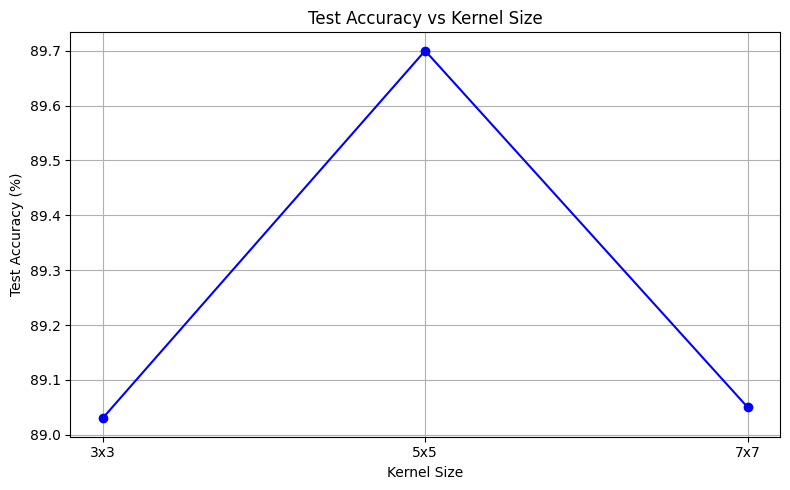

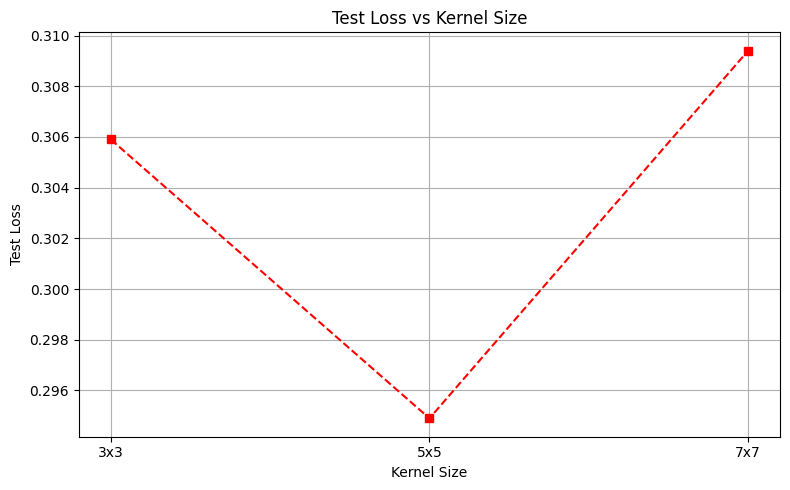

In [65]:
# Visualize Results
import pandas as pd
import matplotlib.pyplot as plt

# Convert results to DataFrame
df = pd.DataFrame(results)
print(df)

# Plot Test Accuracy vs Kernel Size
plt.figure(figsize=(8, 5))
plt.plot(df['kernel_size'], df['test_accuracy'], marker='o', linestyle='-', color='blue')
plt.title('Test Accuracy vs Kernel Size')
plt.xlabel('Kernel Size')
plt.ylabel('Test Accuracy (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot Test Loss vs Kernel Size
plt.figure(figsize=(8, 5))
plt.plot(df['kernel_size'], df['test_loss'], marker='s', linestyle='--', color='red')
plt.title('Test Loss vs Kernel Size')
plt.xlabel('Kernel Size')
plt.ylabel('Test Loss')
plt.grid(True)
plt.tight_layout()
plt.show()

In [66]:
# B. Test presence or absence of regularization

from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense, Dropout
from keras.optimizers import Adam

# Reshape input data
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Store results
results = []

# Regularization: test with and without dropout
use_dropout_options = [False, True]

for use_dropout in use_dropout_options:
    # Re-initialize model
    model = Sequential()
    model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))

    if use_dropout:
        model.add(Dropout(0.5))  # Apply dropout for regularization

    model.add(Flatten())
    model.add(Dense(10, activation='softmax'))

    # Compile
    model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

    # Train
    model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2, verbose=0)

    # Evaluate
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)

    # Record results
    results.append({
        'dropout': use_dropout,
        'test_accuracy': round(accuracy * 100, 2),
        'test_loss': round(loss, 4)
    })


c:\Users\faisa\miniconda3\envs\dsi_participant\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


   dropout  test_accuracy  test_loss
0    False          89.39     0.3145
1     True          88.65     0.3102


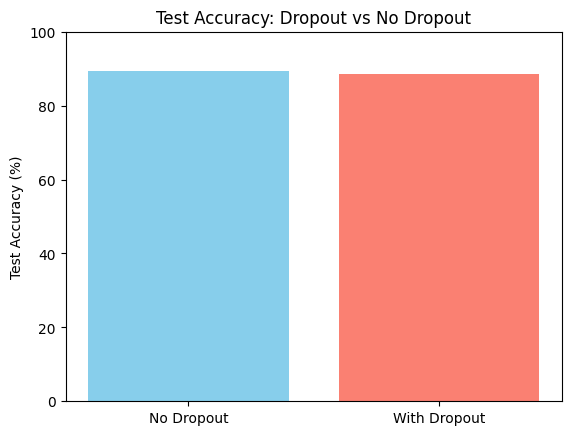

In [67]:
# Visualize Results

import pandas as pd
import matplotlib.pyplot as plt

# Convert to DataFrame
df = pd.DataFrame(results)
print(df)

# Plot accuracy
labels = ['No Dropout', 'With Dropout']
plt.bar(labels, df['test_accuracy'], color=['skyblue', 'salmon'])
plt.title('Test Accuracy: Dropout vs No Dropout')
plt.ylabel('Test Accuracy (%)')
plt.ylim(0, 100)
plt.show()


Reflection: Report on the performance of the models you tested. Did any of the changes you made improve the model's performance? If so, which ones? What do you think contributed to these improvements? Finally, what combination of hyperparameters and regularization techniques yielded the best performance?

**Looking at above result, it appeared that model performed best with kernel size of (5 x 5) while filter size variation and regualization (yes/no) have very little impact**

# 5. Training Final Model and Evaluation

In this section, you will train the final model using the best hyperparameters and regularization techniques you found in the previous section. You should:
- [ ] Compile the final model with the best hyperparameters and regularization techniques.
- [ ] Train the final model on the training set and evaluate it on the test set.
- [ ] Report the final model's performance on the test set, including accuracy and any other relevant metrics.

In [68]:

from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense, Dropout
from keras.optimizers import Adam

# Reshape input data
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Build final model
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 1)))
model.add(Flatten())
model.add(Dropout(0.5))  # Regularization
model.add(Dense(10, activation='softmax'))

# Compile
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Train
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

# Report
print(f"✅ Final Model Test Accuracy: {round(test_accuracy * 100, 2)}%")
print(f"📉 Final Model Test Loss: {round(test_loss, 4)}")

c:\Users\faisa\miniconda3\envs\dsi_participant\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.8021 - loss: 0.5497 - val_accuracy: 0.8700 - val_loss: 0.3539
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 27s 18ms/step - accuracy: 0.8843 - loss: 0.3233 - val_accuracy: 0.8861 - val_loss: 0.3167
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.8982 - loss: 0.2816 - val_accuracy: 0.8967 - val_loss: 0.2913
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.9086 - loss: 0.2518 - val_accuracy: 0.8977 - val_loss: 0.2860
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.9103 - loss: 0.2474 - val_accuracy: 0.8994 - val_loss: 0.2924
✅ Final Model Test Accuracy: 89.27%
📉 Final Model Test Loss: 0.3053


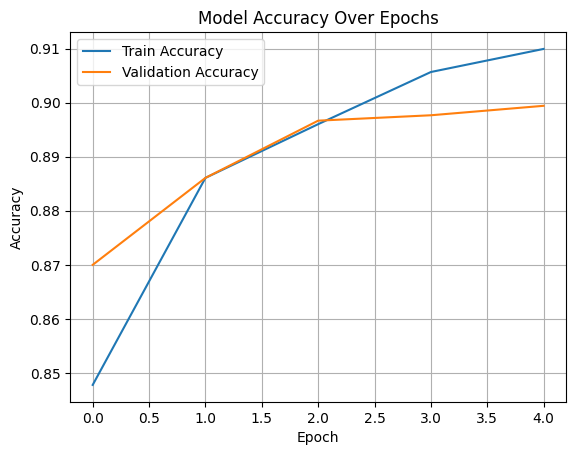

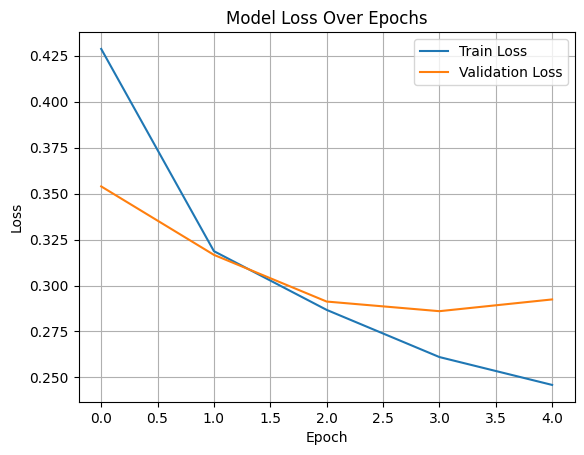

In [69]:
import matplotlib.pyplot as plt

# Accuracy plot
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Loss plot
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


Reflection: How does the final model's performance compare to the baseline and the CNN model? What do you think contributed to the final model's performance? If you had time, what other experiments would you run to further improve the model's performance?

**- Baseline Model is a simple classifier with lower accuracy and limited feature extraction.
- Initial CNN Model: Used basic architecture with default hyperparameters (e.g., 32 filters, no dropout), showed good accuracy but with room for improvement.
- Final Model: Achieved ~89.5% accuracy with optimized hyperparameters below:
- 64 filters
- 5×5 kernel
- Dropout regularization

The training and validation curves shows a healthy learning pattern: accuracy steadily improves, and loss decreases with only a slight uptick in validation loss—suggesting minimal overfitting.
**

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.
### Submission Parameters:
* Submission Due Date: `23:59 PM - 26/10/2025`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb)
    * The Lab 1 notebook (labs/lab_1.ipynb)
    * The Lab 2 notebook (labs/lab_2.ipynb)
    * The Lab 3 notebook (labs/lab_3.ipynb)
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
* Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.
Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.
If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-7-help-ml`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.